# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Students/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-19 Python-3.9.7 torch-1.8.2+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 991.9ms pre-process, 246.8ms inference, 8.0ms NMS per image at shape (1, 3, 384, 640)


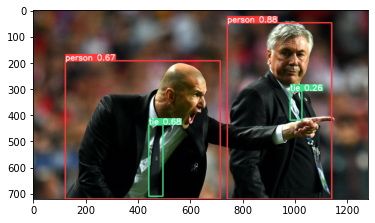

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [4]:
import uuid   # Unique identifier
import os
import time

In [5]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
#labels = ['drowsy','yawn']
labels = ['awake']
number_imgs = 10

In [46]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [40]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\drowsy.ba3566a8-d74e-11ec-af24-744ca19b8716.jpg


In [41]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\drowsy.baa825a2-d74e-11ec-b891-744ca19b8716.jpg
data\images\drowsy.baa825a3-d74e-11ec-84b7-744ca19b8716.jpg
data\images\drowsy.baa825a4-d74e-11ec-9e46-744ca19b8716.jpg
data\images\drowsy.baa825a5-d74e-11ec-b13b-744ca19b8716.jpg
data\images\drowsy.baa825a6-d74e-11ec-9152-744ca19b8716.jpg


In [8]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [42]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [48]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 38 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-164-g177da7f torch 1.8.2+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 5/10 [00:15<00:15,  3.00s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  60%|######    | 6/10 [00:17<00:10,  2.57s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  70%|#######   | 7/10 [00:24<00:11,  3.93s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  80%|########  | 8/10 [00:25<00:06,  3.23s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  90%|######### | 9/10 [00:27<00:02,  2.76s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 10/10 [00:28<00:00,  2.14s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 10/10 [00:28<00:00,  2.85s/it]
                 all        301        300      0.414

    60/199        0G   0.02309  0.007624  0.009624        30       320:  32%|###1      | 6/19 [00:27<00:49,  3.79s/it]
    60/199        0G   0.02309  0.007624  0.009624        30       320:  37%|###6      | 7/19 [00:27<00:51,  4.33s/it]
    60/199        0G   0.02327  0.007713   0.01018        34       320:  37%|###6      | 7/19 [00:30<00:51,  4.33s/it]
    60/199        0G   0.02327  0.007713   0.01018        34       320:  42%|####2     | 8/19 [00:30<00:42,  3.83s/it]
    60/199        0G    0.0233  0.007717   0.01012        34       320:  42%|####2     | 8/19 [00:33<00:42,  3.83s/it]
    60/199        0G    0.0233  0.007717   0.01012        34       320:  47%|####7     | 9/19 [00:33<00:34,  3.49s/it]
    60/199        0G   0.02336  0.007593   0.01021        30       320:  47%|####7     | 9/19 [00:39<00:34,  3.49s/it]
    60/199        0G   0.02336  0.007593   0.01021        30       320:  53%|#####2    | 10/19 [00:39<00:39,  4.35s/it]
    60/199        0G   0.02353   0.00765  0.009

   121/199        0G   0.01797  0.006554  0.006384        27       320:  89%|########9 | 17/19 [01:13<00:07,  3.94s/it]
   121/199        0G   0.01797  0.006554  0.006384        27       320:  95%|#########4| 18/19 [01:13<00:03,  3.81s/it]
   121/199        0G   0.01794  0.006501  0.006476        23       320:  95%|#########4| 18/19 [01:18<00:03,  3.81s/it]
   121/199        0G   0.01794  0.006501  0.006476        23       320: 100%|##########| 19/19 [01:18<00:00,  3.91s/it]
   121/199        0G   0.01794  0.006501  0.006476        23       320: 100%|##########| 19/19 [01:18<00:00,  4.11s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/10 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|#         | 1/10 [00:01<00:14,  1.56s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  20%|##        | 2/10 [00:03<00:13,  1.63s/it]
  

   183/199        0G   0.01474  0.006216  0.005154        35       320:   0%|          | 0/19 [00:02<?, ?it/s]
   183/199        0G   0.01474  0.006216  0.005154        35       320:   5%|5         | 1/19 [00:02<00:50,  2.78s/it]
   183/199        0G   0.01321  0.006421   0.00363        36       320:   5%|5         | 1/19 [00:08<00:50,  2.78s/it]
   183/199        0G   0.01321  0.006421   0.00363        36       320:  11%|#         | 2/19 [00:08<01:14,  4.40s/it]
   183/199        0G   0.01314  0.005772  0.003412        27       320:  11%|#         | 2/19 [00:11<01:14,  4.40s/it]
   183/199        0G   0.01314  0.005772  0.003412        27       320:  16%|#5        | 3/19 [00:11<00:59,  3.71s/it]
   183/199        0G   0.01309  0.005956  0.003594        38       320:  16%|#5        | 3/19 [00:17<00:59,  3.71s/it]
   183/199        0G   0.01309  0.005956  0.003594        38       320:  21%|##1       | 4/19 [00:17<01:10,  4.73s/it]
   183/199        0G   0.01319  0.006087  0.003504      

# 6. Load Custom Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp62/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Students/.cache\torch\hub\master.zip
YOLOv5  2022-5-19 Python-3.9.7 torch-1.8.2+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
img = os.path.join('data', 'images', 'drowsy.cb2a82dc-c707-11ec-9c02-744ca19b8716.jpg')

In [8]:
results = model(img)

In [9]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 14.1ms pre-process, 238.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


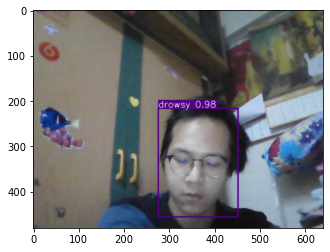

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# 6. Load Custom Model2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp58/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'drowsy.cb2a82dc-c707-11ec-9c02-744ca19b8716.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    neg = np.add(mask, -1)
    inverse = np.where(neg==-1, 1, neg).astype(np.uint8)
    masked_background = cv2.bitwise_and(img, img, mask=inverse)
    final = cv2.add(masked_image, masked_background)
    
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [47]:
!pip install tensorflow==2.7.0 tensorflow-gpu==2.7.0 tf_bodypix opencv-python tfjs_graph_converter matplotlib


In [11]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [12]:
load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))


In [13]:
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))


In [51]:
# get vid cap device
cap = cv2.VideoCapture(0) 

# loop through frame
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Show result to user on desktop
    cv2.imshow('BodyPix', masked_image)
    
    # Break loop outcome 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() # Releases webcam or capture device
cv2.destroyAllWindows() # Closes imshow frames

In [14]:
img = cv2.imread('ls-front-background-scaled (1).jpg')
img = img[:480, :640, :]

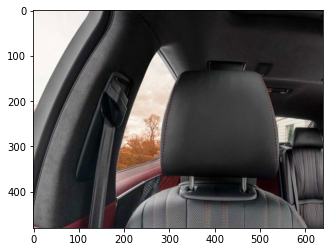

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [24]:
img.shape


(480, 640, 3)

In [34]:
# get vid cap device
cap = cv2.VideoCapture(0) 

# loop through frame
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Apply virtual background
    neg = np.add(mask, -1)
    inverse = np.where(neg==-1, 1, neg).astype(np.uint8)
    masked_background = cv2.bitwise_and(img, img, mask=inverse)
    final = cv2.add(masked_image, masked_background)
    yoloResult = model(frame)

    # Show result to user on desktop
    #cv2.imshow('YOLO', final)
    cv2.imshow('YOLO', cv2.add(final,np.squeeze(yoloResult.render())))

    # Break loop outcome 
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release() # Releases webcam or capture device
cv2.destroyAllWindows() # Closes imshow frames